In [1]:
import pandas as pd
import datetime


In [2]:
#to load the data back in use
df_full = pd.read_pickle('original_turnstile_df.pkl')

In [3]:
#create a new column with using the date & time columns,
# then turning it into a datetime object
df_full['DateTime'] = pd.to_datetime(df_full.DATE.astype(str) + " " + df_full.TIME.astype(str))

In [4]:
#remove whitespace from the column titles
df_full.columns = [column.strip() for column in df_full.columns]
df_full.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'DateTime'],
      dtype='object')

In [5]:
#check for null vals
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628297 entries, 0 to 209660
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   C/A       628297 non-null  object        
 1   UNIT      628297 non-null  object        
 2   SCP       628297 non-null  object        
 3   STATION   628297 non-null  object        
 4   LINENAME  628297 non-null  object        
 5   DIVISION  628297 non-null  object        
 6   DATE      628297 non-null  object        
 7   TIME      628297 non-null  object        
 8   DESC      628297 non-null  object        
 9   ENTRIES   628297 non-null  int64         
 10  EXITS     628297 non-null  int64         
 11  DateTime  628297 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 62.3+ MB


In [6]:
#grouping by turnstiles locations and summing entries/exits by date
# note that SCP is the only location specific column that changes
turnstiles_df = df_full.groupby(['C/A', 'UNIT', 'STATION', 'LINENAME', 'SCP', 'DATE', 'DateTime' ]).sum().reset_index()


In [7]:
turnstiles_df.head(1000)

,C/A,UNIT,STATION,LINENAME,SCP,DATE,DateTime,ENTRIES,EXITS
0,A002,R051,59 ST,NQR456W,02-00-00,08/29/2020,2020-08-29 00:00:00,7450785,2533372
1,A002,R051,59 ST,NQR456W,02-00-00,08/29/2020,2020-08-29 04:00:00,7450788,2533375
2,A002,R051,59 ST,NQR456W,02-00-00,08/29/2020,2020-08-29 08:00:00,7450798,2533391
3,A002,R051,59 ST,NQR456W,02-00-00,08/29/2020,2020-08-29 12:00:00,7450826,2533423
4,A002,R051,59 ST,NQR456W,02-00-00,08/29/2020,2020-08-29 16:00:00,7450910,2533454
...,...,...,...,...,...,...,...,...,...
995,A002,R051,59 ST,NQR456W,02-03-05,09/16/2020,2020-09-16 20:00:00,12005509,1445930
996,A002,R051,59 ST,NQR456W,02-03-05,09/17/2020,2020-09-17 00:00:00,12005628,1445931
997,A002,R051,59 ST,NQR456W,02-03-05,09/17/2020,2020-09-17 04:00:00,12005635,1445931
998,A002,R051,59 ST,NQR456W,02-03-05,09/17/2020,2020-09-17 08:00:00,12005677,1445966


In [8]:
#check for duplicated values
df_full.groupby(['C/A', 'UNIT', 'STATION', 'LINENAME', 'SCP', 'DateTime' ])['ENTRIES'].count().reset_index().sort_values('ENTRIES', ascending = False).head(15)


,C/A,UNIT,STATION,LINENAME,SCP,DateTime,ENTRIES
610077,R627,R063,SUTTER AV-RUTLD,3,00-00-01,2020-09-07 16:00:00,2
499482,R245A,R051,59 ST,456NQRW,01-00-00,2020-09-12 00:00:00,2
320326,N532,R129,BERGEN ST,FG,00-00-01,2020-08-31 17:00:00,2
87,A002,R051,59 ST,NQR456W,02-00-00,2020-09-12 12:00:00,2
320201,N532,R129,BERGEN ST,FG,00-00-00,2020-08-31 17:00:00,2
609953,R627,R063,SUTTER AV-RUTLD,3,00-00-00,2020-09-08 00:00:00,2
610079,R627,R063,SUTTER AV-RUTLD,3,00-00-01,2020-09-08 00:00:00,2
609951,R627,R063,SUTTER AV-RUTLD,3,00-00-00,2020-09-07 16:00:00,2
499484,R245A,R051,59 ST,456NQRW,01-00-00,2020-09-12 08:00:00,2
499483,R245A,R051,59 ST,456NQRW,01-00-00,2020-09-12 04:00:00,2


Looks like 12 entries have duplicate data all coming from 3 stations, check a few of these out.

In [ ]:
#Start with sutter-rutld, over 2 turnstiles and two days
sutter_mask = ((df_full["C/A"] == "R627") & 
(df_full["UNIT"] == "R063") & 
((df_full["SCP"] == "00-00-01") |
(df_full["SCP"] == "00-00-00")) & 
(df_full["STATION"] == "SUTTER AV-RUTLD") &
((df_full["DateTime"].dt.date == datetime.datetime(2020, 9, 7).date()) |
(df_full["DateTime"].dt.date == datetime.datetime(2020, 9, 8).date())))
df_full[sutter_mask].head(15)

In [ ]:
#bergen st same day, same time (1700), two turnstiles
bergen_mask = ((df_full["C/A"] == "N532") & 
(df_full["UNIT"] == "R129") & 
((df_full["SCP"] == "00-00-01") |
(df_full["SCP"] == "00-00-00")) & 
(df_full["STATION"] == "BERGEN ST") &
(df_full["DateTime"].dt.date == datetime.datetime(2020, 8, 31).date()))
df_full[bergen_mask].head(15)

It seems like RECOVR AUD has weird values where there is duplicated data, so I will drop those values

Additionally, will check if there are weird values in other places there is a RECOVR AUD value

In [9]:
#RECOVR AUD rows have weird data so lets just drop them all

df_full = df_full[df_full.DESC=='REGULAR']

In [10]:
#check if they're unique now
df_full.groupby(['C/A', 'UNIT', 'STATION', 'SCP', 'DateTime' ])['ENTRIES'].count().reset_index().sort_values('ENTRIES', ascending = False).head(15)


,C/A,UNIT,STATION,SCP,DateTime,ENTRIES
0,A002,R051,59 ST,02-00-00,2020-08-29 00:00:00,1
417223,R134,R272,28 ST,01-06-02,2020-09-15 05:00:00,1
417216,R134,R272,28 ST,01-06-02,2020-09-14 01:00:00,1
417217,R134,R272,28 ST,01-06-02,2020-09-14 05:00:00,1
417218,R134,R272,28 ST,01-06-02,2020-09-14 09:00:00,1
417219,R134,R272,28 ST,01-06-02,2020-09-14 13:00:00,1
417220,R134,R272,28 ST,01-06-02,2020-09-14 17:00:00,1
417221,R134,R272,28 ST,01-06-02,2020-09-14 21:00:00,1
417222,R134,R272,28 ST,01-06-02,2020-09-15 01:00:00,1
417224,R134,R272,28 ST,01-06-02,2020-09-15 09:00:00,1


## find the daily entries

The turnstile counter does not reset each day, it just keeps increasing the count. In order to find the daliy entries, subtract the previous day from the current day.

In [11]:
#grouping by turnstiles locations and summing entries/exits by date
# note that SCP is the only location specific column that changes
stations_df = df_full.groupby(['C/A', 'UNIT', 'STATION', 'LINENAME', 'DATE']).sum().reset_index()


In [12]:
stations_df.head()

,C/A,UNIT,STATION,LINENAME,DATE,ENTRIES,EXITS
0,A002,R051,59 ST,NQR456W,08/29/2020,353663977,198126524
1,A002,R051,59 ST,NQR456W,08/30/2020,353674428,198135110
2,A002,R051,59 ST,NQR456W,08/31/2020,353686433,198148360
3,A002,R051,59 ST,NQR456W,09/01/2020,353707933,198166598
4,A002,R051,59 ST,NQR456W,09/02/2020,353730492,198185494


### ignore below

In [ ]:
#grab the first turnstile for each date for each station
ststions_df = (df_full.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False).ENTRIES.first())


In [ ]:
daily_entries_df.head()

### ignore above

In [13]:
#create two new columns that are the previous day with associated 
#number of entries
stations_df[['Previous_date', 'Previous_Entries']] = (stations_df.groupby(["C/A", "UNIT", "STATION", "LINENAME"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))

<ipython-input-13-3c7abcf33e93>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  stations_df[['Previous_date', 'Previous_Entries']] = (stations_df.groupby(["C/A", "UNIT", "STATION", "LINENAME"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))


In [14]:
stations_df.head()

,C/A,UNIT,STATION,LINENAME,DATE,ENTRIES,EXITS,Previous_date,Previous_Entries
0,A002,R051,59 ST,NQR456W,08/29/2020,353663977,198126524,NaN,NaN
1,A002,R051,59 ST,NQR456W,08/30/2020,353674428,198135110,08/29/2020,353663977.0
2,A002,R051,59 ST,NQR456W,08/31/2020,353686433,198148360,08/30/2020,353674428.0
3,A002,R051,59 ST,NQR456W,09/01/2020,353707933,198166598,08/31/2020,353686433.0
4,A002,R051,59 ST,NQR456W,09/02/2020,353730492,198185494,09/01/2020,353707933.0


In [15]:
#drop the first row associated with each new station in order to 
# not combine data for different turnstiles
stations_df.dropna(subset = ['Previous_date'], axis = 0, inplace = True)

In [16]:
stations_df.head()

,C/A,UNIT,STATION,LINENAME,DATE,ENTRIES,EXITS,Previous_date,Previous_Entries
1,A002,R051,59 ST,NQR456W,08/30/2020,353674428,198135110,08/29/2020,353663977.0
2,A002,R051,59 ST,NQR456W,08/31/2020,353686433,198148360,08/30/2020,353674428.0
3,A002,R051,59 ST,NQR456W,09/01/2020,353707933,198166598,08/31/2020,353686433.0
4,A002,R051,59 ST,NQR456W,09/02/2020,353730492,198185494,09/01/2020,353707933.0
5,A002,R051,59 ST,NQR456W,09/03/2020,353753348,198204420,09/02/2020,353730492.0


In [17]:
#make sure that the count is actually increasing each day
# i.e., we should have count(yesterday) < count(today)
# but it looks like that's not the case
counter_mask = (stations_df['ENTRIES'] < stations_df['Previous_Entries'])
stations_df[counter_mask]

,C/A,UNIT,STATION,LINENAME,DATE,ENTRIES,EXITS,Previous_date,Previous_Entries
59,A007,R079,5 AV/59 ST,NQRW,09/15/2020,753398109,34731169,09/14/2020,1.130088e+09
77,A010,R080,57 ST-7 AV,NQRW,09/12/2020,375562005,140323051,09/11/2020,3.975106e+08
111,A013,R081,49 ST,NQRW,09/04/2020,152602116,307887908,09/03/2020,1.780288e+08
150,A015,R081,49 ST,NQRW,09/01/2020,198702519,110010218,08/31/2020,2.117487e+08
232,A025,R023,34 ST-HERALD SQ,BDFMNQRW,08/30/2020,7909459657,11414629126,08/29/2020,7.910489e+09
...,...,...,...,...,...,...,...,...,...
15551,R727,R430,PELHAM PKWY,5,09/16/2020,2220940437,969075163,09/15/2020,2.658626e+09
15620,S101,R070,ST. GEORGE,1,09/01/2020,109305378,89976,08/31/2020,1.215648e+08
15631,S101,R070,ST. GEORGE,1,09/12/2020,101372921,79540,09/11/2020,1.216425e+08
15670,S102,R165,TOMPKINSVILLE,1,09/09/2020,7542070,209631,09/08/2020,1.508286e+07


In [18]:
#how many tursntiles have this issue?
stations_df[counter_mask].groupby(["C/A", "UNIT", "STATION", "LINENAME"]).size()


C/A    UNIT  STATION          LINENAME
A007   R079  5 AV/59 ST       NQRW        1
A010   R080  57 ST-7 AV       NQRW        1
A013   R081  49 ST            NQRW        1
A015   R081  49 ST            NQRW        1
A025   R023  34 ST-HERALD SQ  BDFMNQRW    4
                                         ..
R641   R210  BEVERLY RD       25          1
R727   R430  PELHAM PKWY      5           2
S101   R070  ST. GEORGE       1           2
S102   R165  TOMPKINSVILLE    1           1
TRAM1  R468  RIT-MANHATTAN    R           1
Length: 353, dtype: int64

Looks like 353 turnstiles have the reverse counter problem.

This just means that the difference will be negative. we can fix this by considering the absolute value

## IGNORE BELOW

In [ ]:
daily_entries_df['Daily_Entries'] = (daily_entries_df['ENTRIES'] - daily_entries_df['Previous_Entries']).abs()

In [ ]:
daily_entries_df.head()

In [ ]:
#check our top values to see if they're resasonable
daily_entries_df.sort_values(['Daily_Entries'], ascending=False).head(10)

In [ ]:
#check top 10
#these look way too high
daily_entries_df.nlargest(10, 'Daily_Entries')

In [ ]:
#how many rows have daily entries > 1mill

entry_mask = (daily_entries_df['Daily_Entries'] > 1000000)
daily_entries_df[entry_mask].groupby(["C/A", "UNIT", "SCP", "STATION"]).size()

In [ ]:
#let's check the average daily entries for the rows that are 
# smaller than 1million

entry_mask_opp = (daily_entries_df['Daily_Entries'] < 1000000)
daily_entries_df[entry_mask_opp].groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"]).mean()

In [ ]:
#check the top
(daily_entries_df[entry_mask_opp].groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"]).mean().sort_values(by='Daily_Entries', ascending = False))


## IGNORE ABOVE

# Questions

notice that the last few rows had the same values for entries and previous entries

also, our max had only 24 entries the first day and ~900,000 the next.

### How to deal with this type of inconsistent data?

- choose some min and max difference threshold to place on day to day differences?

- put an upper limit that we say is an unreasonable amount?

- lower limit?

In [19]:
#try vinny's method of resetting the counter manually if it is too 
# high

def daily_count2(row, max_count):
    count = row['ENTRIES'] - row['Previous_Entries']
    
    if count < 0:
        count *= -1
        
    if count > max_count:
        print(row["ENTRIES"], row["Previous_Entries"])
        count = min(row["ENTRIES"], row["Previous_Entries"])
        
    if count > max_count:
        return 0
    return count

stations_df['Daily_Entries'] = stations_df.apply(daily_count2, axis=1, max_count=1000000)


1130088150 753388160.0
753398109 1130088150.0
375562005 397510575.0
397550465 375562005.0
178028808 152590227.0
152602116 178028808.0
198702519 211748735.0
211758343 198702519.0
7909459657 7910488904.0
5417447031 7909459657.0
430002960 5417447031.0
488075764 430002960.0
406870155 488224980.0
488276941 406870155.0
74179970 78051036.0
731877095 734418252.0
734458828 731877095.0
96915810 193823172.0
161539371 96915810.0
193865992 161547263.0
237995250 475987448.0
396664478 237995250.0
476002887 396664478.0
320144730 384165100.0
384182061 320144730.0
4654887986 4672113823.0
4659217220 4654887986.0
4672168240 4659217220.0
1287218096 1288814616.0
1289002897 1287218096.0
12898694175 15478424288.0
140791120 168944959.0
8133159 7082648.0
10233251 8133159.0
8551450 10258936.0
12982979 15578513.0
1579379707 1584056641.0
1584067013 1579379707.0
1581924093 1584076040.0
1584081424 1581924093.0
103061022 123665965.0
123680632 103061022.0
86343366 74003446.0
74014290 86343366.0
111049083 74031426.0
74

26772032 25160988.0
26735364 25545278.0
13370511 12022597.0
11764517 13022743.0
13236977 11764517.0
13456526 12452415.0
11994889 13182710.0
13481461 11994889.0
13647706 12636479.0
12178502 13374021.0
13684961 12178502.0
29601639 31052418.0
30699793 29601639.0
31283650 30004375.0
30002016 31464097.0
31127551 30002016.0
31676843 30385250.0
29272376 31237088.0
30424775 29272376.0
983785424 982719448.0
132244290 198365852.0
198369371 132244290.0
71300169 61110841.0
61118736 71300169.0
3660858918 4393029599.0
4393031980 3660858918.0
18426740 22107492.0
22117387 18426740.0
1704712469 1461179148.0
1461194265 1704719357.0
755018445 1461230412.0
49039380 755018445.0
47827772 49058350.0
49071894 47827772.0
34189261 29303090.0
29308507 34189261.0
13834217 41500121.0
72452739 60374948.0
7863789 9435542.0
9437749 7863789.0
231947089 235243786.0
225347668 231947089.0
147602873 152692775.0
152703979 147602873.0
234687239 176005189.0
176020524 234687239.0
8760166730 10512158726.0
10512239664 876016673

In [20]:
stations_df.head()

,C/A,UNIT,STATION,LINENAME,DATE,ENTRIES,EXITS,Previous_date,Previous_Entries,Daily_Entries
1,A002,R051,59 ST,NQR456W,08/30/2020,353674428,198135110,08/29/2020,353663977.0,10451.0
2,A002,R051,59 ST,NQR456W,08/31/2020,353686433,198148360,08/30/2020,353674428.0,12005.0
3,A002,R051,59 ST,NQR456W,09/01/2020,353707933,198166598,08/31/2020,353686433.0,21500.0
4,A002,R051,59 ST,NQR456W,09/02/2020,353730492,198185494,09/01/2020,353707933.0,22559.0
5,A002,R051,59 ST,NQR456W,09/03/2020,353753348,198204420,09/02/2020,353730492.0,22856.0


In [21]:
#check for any daily entries above 1million
entry_mask = (stations_df['Daily_Entries'] > 1000000)
stations_df[entry_mask].groupby(["C/A", "UNIT", "STATION", "LINENAME"]).size()
    

Series([], dtype: int64)

In [22]:
stations_df.nlargest(10, 'Daily_Entries')

,C/A,UNIT,STATION,LINENAME,DATE,ENTRIES,EXITS,Previous_date,Previous_Entries,Daily_Entries
9522,PTH16,R550,LACKAWANNA,1,09/05/2020,10653034,10896624,09/04/2020,9.664220e+06,988814.0
500,A042,R086,PRINCE ST,NRW,09/15/2020,65770828,148351641,09/14/2020,6.675685e+07,986026.0
2207,D015,R396,AVENUE U,N,09/05/2020,68977403,72639914,09/04/2020,6.800065e+07,976757.0
2202,D015,R396,AVENUE U,N,08/31/2020,71838454,74084035,08/30/2020,7.086342e+07,975038.0
9375,PTH06,R546,PAVONIA/NEWPORT,1,09/05/2020,8764183,15971261,09/04/2020,9.738047e+06,973864.0
10457,R138,R293,34 ST-PENN STA,123ACE,09/18/2020,10513722118,14009279349,09/17/2020,1.051276e+10,966677.0
2907,H022,R279,JEFFERSON ST,L,09/12/2020,119688513,53553472,09/11/2020,1.187244e+08,964157.0
2201,D015,R396,AVENUE U,N,08/30/2020,70863416,73586263,08/29/2020,7.182596e+07,962540.0
2209,D015,R396,AVENUE U,N,09/07/2020,68022255,72158085,09/06/2020,6.898437e+07,962119.0
2210,D015,R396,AVENUE U,N,09/08/2020,67062099,71671376,09/07/2020,6.802226e+07,960156.0


In [23]:
#let's make a second column with a smaller max count = 600,000
stations_df["Daily_Entries2"] = stations_df.apply(daily_count2, axis=1, max_count=600000)


1130088150 753388160.0
753398109 1130088150.0
375562005 397510575.0
397550465 375562005.0
178028808 152590227.0
152602116 178028808.0
198702519 211748735.0
211758343 198702519.0
7909459657 7910488904.0
5417447031 7909459657.0
430002960 5417447031.0
488075764 430002960.0
406870155 488224980.0
488276941 406870155.0
74179970 78051036.0
731877095 734418252.0
734458828 731877095.0
96915810 193823172.0
161539371 96915810.0
193865992 161547263.0
237995250 475987448.0
396664478 237995250.0
476002887 396664478.0
320144730 384165100.0
384182061 320144730.0
65770828 66756854.0
4654887986 4672113823.0
4659217220 4654887986.0
4672168240 4659217220.0
1287218096 1288814616.0
1289002897 1287218096.0
12898694175 15478424288.0
140791120 168944959.0
8133159 7082648.0
10233251 8133159.0
8551450 10258936.0
12982979 15578513.0
1579379707 1584056641.0
1584067013 1579379707.0
1581924093 1584076040.0
1584081424 1581924093.0
103061022 123665965.0
123680632 103061022.0
86343366 74003446.0
74014290 86343366.0
111

6711780276 8054128500.0
8054144072 6711780276.0
8043122615 8054192568.0
8054202340 8043122615.0
8672528962 10407021607.0
10407041200 8672528962.0
135125396 196778691.0
49031384 135125396.0
64729190 49031384.0
244523959 306714629.0
294298286 244523959.0
306750449 294298286.0
255639125 306758507.0
306777379 255639125.0
260124952 312138510.0
312156739 260124952.0
29783137 24817824.0
4548580238 4559680431.0
4559710319 4548580238.0
4548976024 4560071543.0
8178971 9781847.0
9684866 8178971.0
283060327 288723231.0
288739853 283060327.0
271815729 288822342.0
96578947 115890194.0
115897883 96578947.0
216247514 218268226.0
218306164 216247514.0
181954107 218333883.0
218358622 181954107.0
291227892 218399823.0
218439272 291227892.0
307331423 368766363.0
368703779 307331423.0
368057035 368662851.0
430260630 368057035.0
369037606 430260630.0
359296642 369037606.0
349163989 359296642.0
309991655 321999686.0
249879721 309991655.0
273994434 249930144.0
322113651 273994434.0
97444795 99566540.0
9959279

In [24]:
stations_df.nlargest(10, 'Daily_Entries2')

,C/A,UNIT,STATION,LINENAME,DATE,ENTRIES,EXITS,Previous_date,Previous_Entries,Daily_Entries,Daily_Entries2
9361,PTH05,R543,EXCHANGE PLACE,1,09/12/2020,19086392,14830579,09/11/2020,19677600.0,591208.0,591208.0
7089,N329A,R201,WOODHAVEN BLVD,MR,09/07/2020,4705787,2324464,09/06/2020,4116345.0,589442.0,589442.0
9357,PTH05,R543,EXCHANGE PLACE,1,09/08/2020,18768686,14804058,09/07/2020,19354155.0,585469.0,585469.0
7088,N329A,R201,WOODHAVEN BLVD,MR,09/06/2020,4116345,2033793,09/05/2020,4694916.0,578571.0,578571.0
9385,PTH06,R546,PAVONIA/NEWPORT,1,09/15/2020,8963909,16090375,09/14/2020,9538333.0,574424.0,574424.0
9354,PTH05,R543,EXCHANGE PLACE,1,09/05/2020,18994208,14712082,09/04/2020,19568442.0,574234.0,574234.0
9454,PTH11,R545,14TH STREET,1,08/31/2020,9481752,10693262,08/30/2020,10051643.0,569891.0,569891.0
14686,R533,R055,FLUSHING-MAIN,7,09/11/2020,531011976,581618316,09/10/2020,531578880.0,566904.0,566904.0
9424,PTH09,R548,CHRISTOPHER ST,1,09/12/2020,6502709,6513410,09/11/2020,5937643.0,565066.0,565066.0
9427,PTH09,R548,CHRISTOPHER ST,1,09/15/2020,6521592,6535139,09/14/2020,5956793.0,564799.0,564799.0


In [25]:
stations_df["Daily_Entries3"] = stations_df.apply(daily_count2, axis=1, max_count=10000)


353674428 353663977.0
353686433 353674428.0
353707933 353686433.0
353730492 353707933.0
353753348 353730492.0
353776187 353753348.0
353797210 353776187.0
353811522 353797210.0
353823279 353811522.0
353838817 353823279.0
353862769 353838817.0
353887500 353862769.0
353910700 353887500.0
353986703 353910700.0
354110828 353986703.0
354126794 354110828.0
354152770 354126794.0
354180677 354152770.0
354209174 354180677.0
354236735 354209174.0
126862726 126851096.0
126879547 126862726.0
126896375 126879547.0
126912882 126896375.0
126929501 126912882.0
126944247 126929501.0
126955642 126944247.0
126977962 126965334.0
126995545 126977962.0
127013057 126995545.0
127029837 127013057.0
127045293 127029837.0
127056093 127045293.0
127067034 127056093.0
127084898 127067034.0
127103620 127084898.0
127122362 127103620.0
127140970 127122362.0
1130088150 753388160.0
753398109 1130088150.0
397247804 397234600.0
397263905 397247804.0
397287199 397263905.0
397311973 397287199.0
397337144 397311973.0
39736170

56942435 56932301.0
56972593 56959985.0
56985470 56972593.0
56998030 56985470.0
57010586 56998030.0
1704899857 1704885547.0
1704917525 1704899857.0
1704935597 1704917525.0
1704954392 1704935597.0
1704973528 1704954392.0
1704989174 1704973528.0
1705000914 1704989174.0
1705012413 1705000914.0
1705028767 1705012413.0
1705049191 1705028767.0
1705069551 1705049191.0
1705089071 1705069551.0
1705105385 1705089071.0
1705117983 1705105385.0
1705133872 1705117983.0
1705153838 1705133872.0
1705174438 1705153838.0
1705195219 1705174438.0
1705215758 1705195219.0
65997013 65986887.0
66030726 66020145.0
66041486 66030726.0
66052103 66041486.0
66062784 66052103.0
3812968795 3812956093.0
3812990512 3812968795.0
3813006167 3812990512.0
3813020784 3813006167.0
3813036907 3813020784.0
3813056886 3813036907.0
3813080905 3813056886.0
3813107396 3813080905.0
3813134907 3813107396.0
3813162059 3813134907.0
3813180758 3813162059.0
3813196710 3813180758.0
3813211223 3813196710.0
3813227257 3813211223.0
38132427

579961588 676619035.0
149492020 149481635.0
149502856 149492020.0
149514197 149502856.0
149526019 149514197.0
149536983 149526019.0
149571373 149559480.0
149583293 149571373.0
149595121 149583293.0
149607027 149595121.0
149636499 149623391.0
149649392 149636499.0
149662661 149649392.0
149675869 149662661.0
3903585088 3903570070.0
3903605444 3903585088.0
3903492458 3903605444.0
3904431723 3903492458.0
3904456859 3904431723.0
3904483020 3904456859.0
3904508576 3904483020.0
3904529337 3904508576.0
3904548308 3904529337.0
3904568565 3904548308.0
3904595575 3904568565.0
3904622417 3904595575.0
3904647709 3904622417.0
3904675272 3904647709.0
3904698090 3904675272.0
3904718575 3904698090.0
3904747260 3904718575.0
3904776273 3904747260.0
3904806451 3904776273.0
3904835219 3904806451.0
8841366723 8821729316.0
8841392527 8841366723.0
8841434881 8841392527.0
8826136705 8841434881.0
8780155915 8826136705.0
8841568744 8780155915.0
8841608016 8841568744.0
8841633373 8841608016.0
8841655171 884163337

70104482 84117640.0
84131178 70104482.0
70128045 84144969.0
84161233 70128045.0
399287804 399273555.0
399302634 399287804.0
399317442 399302634.0
399331831 399317442.0
399360831 399345551.0
399376628 399360831.0
399391934 399376628.0
399403565 399391934.0
399429254 399413272.0
399446067 399429254.0
399462729 399446067.0
399478739 399462729.0
254854158 254843631.0
254865273 254854158.0
254875924 254865273.0
254896946 254885856.0
254908760 254896946.0
254920409 254908760.0
254931246 254920409.0
2174358528 2238247586.0
2146176485 2174358528.0
7516745342 9020091413.0
9020100636 7516745342.0
7516775275 9020127344.0
9020132939 7516775275.0
39087254219 9020132939.0
7516786958 39087254219.0
9020151436 7516786958.0
6013451282 9020169853.0
9020184474 6013451282.0
8960174495 9020184474.0
5965452185 8960174495.0
4948874589 4948861555.0
4948901500 4948874589.0
4948930030 4948901500.0
4948958555 4948930030.0
4948987131 4948958555.0
4949008375 4948987131.0
4949054371 4949024591.0
4949085418 494905437

170103494 170089790.0
170116144 170103494.0
170130802 170116144.0
170143636 170130802.0
198513882 170143636.0
170166300 198513882.0
198558592 170184125.0
81605714 81594813.0
81617496 81605714.0
81629679 81617496.0
81642204 81629679.0
81654371 81642204.0
81692708 81680277.0
68087991 81692708.0
81717780 68087991.0
81731786 81717780.0
81745415 81731786.0
81756800 81745415.0
81769828 81756800.0
81785627 81769828.0
81802115 81785627.0
81818924 81802115.0
824261347 824251332.0
824301729 824291225.0
824311794 824301729.0
824366195 824356023.0
824376725 824366195.0
824387124 824376725.0
116772884 116760383.0
116785911 116772884.0
116799096 116785911.0
116812284 116799096.0
116824077 116812284.0
116849185 116838893.0
116862940 116849185.0
116876719 116862940.0
116889990 116876719.0
116901576 116889990.0
116931760 116918404.0
116945337 116931760.0
116958971 116945337.0
116972429 116958971.0
176874840 176863950.0
176888979 176874840.0
176902927 176888979.0
176917223 176902927.0
176932462 17691722

192248616 192238480.0
192259076 192248616.0
192297083 192286570.0
192308272 192297083.0
192318757 192308272.0
192329002 192318757.0
1704712469 1461179148.0
1461194265 1704719357.0
755018445 1461230412.0
49039380 755018445.0
47827772 49058350.0
49071894 47827772.0
34189261 29303090.0
29308507 34189261.0
28497760 29350512.0
29358142 28497760.0
13834217 41500121.0
13139194398 13139183666.0
13139210976 13139194398.0
13139228367 13139210976.0
13139246020 13139228367.0
13139263807 13139246020.0
13139278340 13139263807.0
13139305230 13139294560.0
13139323333 13139305230.0
13139342275 13139323333.0
13139362069 13139342275.0
13139380452 13139362069.0
13139401019 13139390245.0
13139420375 13139401019.0
13139440513 13139420375.0
13139460399 13139440513.0
13139480159 13139460399.0
72452739 60374948.0
72176624 72455740.0
72464251 72176624.0
72215927 72498510.0
72505620 72215927.0
72240094 72523565.0
7863789 9435542.0
9437749 7863789.0
92811864 93364209.0
93370440 92811864.0
235235331 235225106.0
23

226010490 225999228.0
226027528 226010490.0
226045100 226027528.0
226063413 226045100.0
226080993 226063413.0
226094401 226080993.0
226106375 226094401.0
226124014 226106375.0
226143513 226124014.0
226163412 226143513.0
226183201 226163412.0
86250370 86239467.0
86262090 86250370.0
86274402 86262090.0
86287235 86274402.0
86299198 86287235.0
86334885 86322703.0
86347762 86334885.0
86360662 86347762.0
86373848 86360662.0
86405224 86392226.0
86418948 86405224.0
86433045 86418948.0
86447353 86433045.0
56219970 58507712.0
58510668 56219970.0
491121474 491099506.0
491148746 491121474.0
491191404 491148746.0
491236170 491191404.0
491280977 491236170.0
491327722 491280977.0
491372471 491327722.0
491404645 491372471.0
491431628 491404645.0
491465450 491431628.0
491511556 491465450.0
491558973 491511556.0
491605197 491558973.0
491652389 491605197.0
491687570 491652389.0
491721645 491687570.0
491769054 491721645.0
491818081 491769054.0
491867589 491818081.0
491918028 491867589.0
12026397918 120248

58424210 64045576.0
64062992 58424210.0
64073093 64062992.0
64083135 64073093.0
64093243 64083135.0
10923656851 9103038887.0
10923673746 10923656851.0
10923694887 10923673746.0
10923713736 10923694887.0
10923734571 10923713736.0
10923757916 10923734571.0
9096674797 10923757916.0
10923786019 9096674797.0
10923810086 10923795767.0
10923828479 10923810086.0
10923846759 10923828479.0
10923868820 10923846759.0
10923890117 10923868820.0
10923905152 10923890117.0
10923924306 10923905152.0
10923951513 10923924306.0
10923979352 10923951513.0
10924006776 10923979352.0
10924032610 10924006776.0
79813628 79800991.0
79828227 79813628.0
79844248 79828227.0
79860509 79844248.0
79875945 79860509.0
79889116 79875945.0
79920791 79907771.0
79937752 79920791.0
79954987 79937752.0
79972440 79954987.0
79987399 79972440.0
79998384 79987399.0
80011834 79998384.0
80029497 80011834.0
80047102 80029497.0
80064262 80047102.0
80082109 80064262.0
55816078 55804957.0
55831265 55816078.0
55847467 55831265.0
55863812 

114261819 114250825.0
114273641 114261819.0
114284074 114273641.0
114318600 114306925.0
114330126 114318600.0
114341588 114330126.0
114365981 114354036.0
114378350 114365981.0
114390511 114378350.0
114402835 114390511.0
178996063 178981374.0
179011156 178996063.0
179026561 179011156.0
179042335 179026561.0
179054915 179042335.0
179079263 179068511.0
179095182 179079263.0
179111546 179095182.0
179127780 179111546.0
149299379 179144632.0
179178009 149299379.0
179195034 179178009.0
179211687 179195034.0
5733167697 5733157267.0
5733182757 5733167697.0
5733204124 5733182757.0
5733225264 5733204124.0
5733247026 5733225264.0
5733268806 5733247026.0
5733287182 5733268806.0
5733300104 5733287182.0
5733311658 5733300104.0
4777772561 5733311658.0
5733351823 4777772561.0
5733374617 5733351823.0
5733397336 5733374617.0
5733410241 5733397336.0
5733421064 5733410475.0
5733444455 5733421064.0
5733468101 5733444455.0
5733491555 5733468101.0
5733514709 5733491555.0
509818956 509808836.0
509856066 509846

In [26]:
stations_df.nlargest(10, 'Daily_Entries3')

,C/A,UNIT,STATION,LINENAME,DATE,ENTRIES,EXITS,Previous_date,Previous_Entries,Daily_Entries,Daily_Entries2,Daily_Entries3
2405,E013,R373,20 AV,D,09/14/2020,56959985,32353862,09/13/2020,56949986.0,9999.0,9999.0,9999.0
13420,R329,R362,ALLERTON AV,25,09/05/2020,136907708,13604945,09/04/2020,136897709.0,9999.0,9999.0,9999.0
8237,N525,R142,DELANCEY/ESSEX,FJMZ,08/31/2020,169984384,146113714,08/30/2020,169974386.0,9998.0,9998.0,9998.0
3578,J031,R006,WOODHAVEN BLVD,JZ,09/11/2020,72565561,63024911,09/10/2020,72555564.0,9997.0,9997.0,9997.0
8223,N523,R300,2 AV,F,09/07/2020,284659598,322297317,09/06/2020,284649601.0,9997.0,9997.0,9997.0
4421,N043,R186,86 ST,BC,09/14/2020,156775266,76273368,09/13/2020,156765272.0,9994.0,9994.0,9994.0
14303,R514,R094,ASTORIA BLVD,NQW,09/06/2020,402622145,4097724567,09/05/2020,402612151.0,9994.0,9994.0,9994.0
2288,E004,R234,50 ST,D,09/02/2020,79790843,76958265,09/01/2020,79780850.0,9993.0,9993.0,9993.0
11911,R231A,R176,33 ST,6,09/02/2020,97652997,54688541,09/01/2020,97643004.0,9993.0,9993.0,9993.0
12809,R291,R183,BEDFORD PK BLVD,4,09/03/2020,21005606,9605214,09/02/2020,20995614.0,9992.0,9992.0,9992.0


In [ ]:
#drop the zero daily entres
stations_df = stations_df[stations_df.Daily_Entries3 !=0]

In [37]:
stations_df.describe()

,ENTRIES,EXITS,Previous_Entries,Daily_Entries,Daily_Entries2,Daily_Entries3
count,8.107000e+03,8.107000e+03,8.107000e+03,8107.000000,8107.000000,8107.000000
mean,1.453952e+09,1.152073e+09,1.453947e+09,5097.053411,5097.053411,5097.053411
std,3.471209e+09,3.134281e+09,3.471208e+09,2667.379595,2667.379595,2667.379595
min,8.620000e+03,2.284300e+04,8.592000e+03,1.000000,1.000000,1.000000
25%,4.712713e+07,2.830911e+07,4.712202e+07,2895.500000,2895.500000,2895.500000
50%,9.903908e+07,7.158055e+07,9.903456e+07,5143.000000,5143.000000,5143.000000
75%,6.934030e+08,1.766460e+08,6.933962e+08,7256.000000,7256.000000,7256.000000
max,2.763686e+10,2.782090e+10,2.763685e+10,9999.000000,9999.000000,9999.000000


## Some vis

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily_Entries', ylabel='Density'>

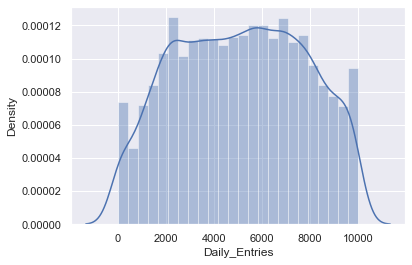

In [38]:
sns.distplot(stations_df['Daily_Entries']
             [stations_df['Daily_Entries'] < 50000])

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily_Entries2', ylabel='Density'>

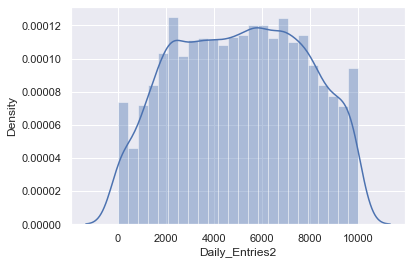

In [39]:
sns.distplot(stations_df['Daily_Entries2']
             [stations_df['Daily_Entries2'] < 30000])

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily_Entries3', ylabel='Density'>

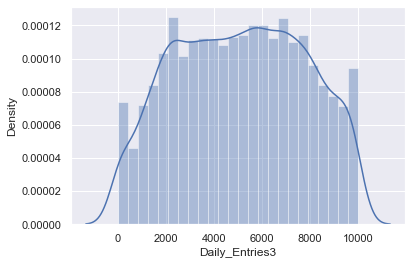

In [40]:
sns.distplot(stations_df['Daily_Entries3']
             [stations_df['Daily_Entries3'] < 10000])

investigate stations that have the same name but different locations

In [33]:
stations_daily = (stations_df.groupby(['STATION', 'DATE'])['Daily_Entries3'].sum().reset_index())

stations_daily.head()

,STATION,DATE,Daily_Entries3
0,1 AV,08/30/2020,7808.0
1,1 AV,08/31/2020,13014.0
2,1 AV,09/01/2020,6215.0
3,1 AV,09/02/2020,6635.0
4,1 AV,09/03/2020,6729.0


In [34]:
top10_stations = \
    (stations_daily.groupby(['STATION'])['Daily_Entries3'].sum()
                   .reset_index()
                   .sort_values(by='Daily_Entries3',ascending=False) 
                   .STATION.head(10))
top10_stations

45               23 ST
58      34 ST-PENN STA
209          FULTON ST
12               14 ST
103              86 ST
208    FT HAMILTON PKY
50               28 ST
5               116 ST
166     CATHEDRAL PKWY
330            WALL ST
Name: STATION, dtype: object

In [35]:
stations_daily_top10 = stations_df[stations_df['STATION'].isin(top10_stations)]

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Daily_Entries3', ylabel='STATION'>

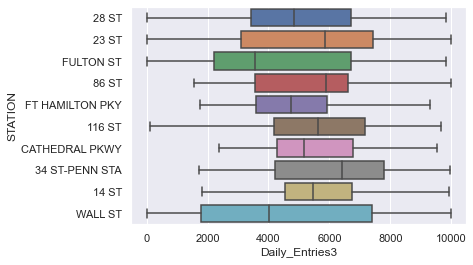

In [36]:
sns.boxplot('Daily_Entries3', 'STATION', data=stations_daily_top10)

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily_Entries3', ylabel='Density'>

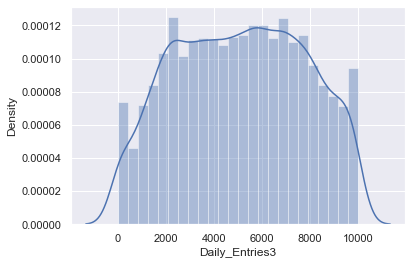

In [32]:
#try to drop our 0 daily entries values
sns.distplot(stations_df['Daily_Entries3']
             [stations_df['Daily_Entries3'] < 10000])

get top 50 stations

In [44]:
top20_stations = \
    (stations_daily.groupby(['STATION'])['Daily_Entries3'].sum()
                   .reset_index()
                   .sort_values(by='Daily_Entries3',ascending=False) 
                   .STATION.head(20))
top20_stations

45               23 ST
58      34 ST-PENN STA
209          FULTON ST
12               14 ST
103              86 ST
208    FT HAMILTON PKY
50               28 ST
5               116 ST
166     CATHEDRAL PKWY
330            WALL ST
8               125 ST
162           CANAL ST
74               50 ST
54               33 ST
140    BEDFORD PK BLVD
169        CHAMBERS ST
142          BERGEN ST
69               49 ST
179       CORTLANDT ST
240     KINGSBRIDGE RD
Name: STATION, dtype: object

In [45]:
stations_daily_top20 = stations_df[stations_df['STATION'].isin(top20_stations)]


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Daily_Entries3', ylabel='STATION'>

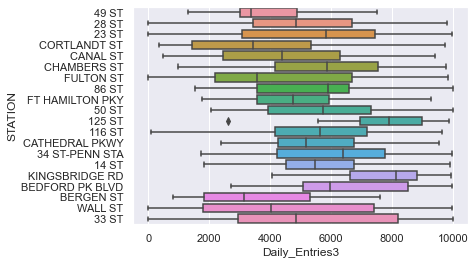

In [46]:
sns.boxplot('Daily_Entries3', 'STATION', data=stations_daily_top20)